In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bnk=pd.read_csv('Churn_Modelling.csv.xls')
bnk

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
bnk.shape

(10000, 14)

In [4]:
bnk.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
bnk.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
bnk.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
bnk.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 1- What is the overall churn rate in the dataset, and how does it compare to industry benchmarks?

churn rate=(Lost Customers ÷ Total Customers at the Start of Time Period) x 100

In [25]:
exited=(bnk['Exited']==1).value_counts()
exited
#2037 people exited from the bank

False    7963
True     2037
Name: Exited, dtype: int64

In [19]:
bnk.shape

(10000, 14)

In [26]:
churn_per=(2037/10000)*100
churn_per
#around 20% people exited which will bring loss to the industry 

20.369999999999997

In [31]:
bnk[(bnk['Exited']==1)&( bnk['Balance']==0)]
#500 people have been exited from the bank by completely withdrawing their balance

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.0,3,1,0,140469.38,1
58,59,15623944,T'ien,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1
81,82,15663706,Leonard,777,France,Female,32,2,0.0,1,1,0,136458.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9785,15687626,Zhirov,527,France,Male,39,4,0.0,2,1,0,167183.07,1
9884,9885,15686974,Sergeyeva,751,France,Female,48,4,0.0,1,0,1,30165.06,1
9898,9899,15746569,Tsui,589,France,Male,38,4,0.0,1,1,0,95483.48,1
9962,9963,15594612,Flynn,702,Spain,Male,44,9,0.0,1,0,0,59207.41,1


In [4]:
bnk[(bnk['Exited']==1)&( bnk['Balance']==0)&(bnk['Age']>60)].shape
#24 people have been exited from bank @ their old age

(24, 14)

C:\Users\theja\AppData\Local\Temp\ipykernel_9444\2423184104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bnk['Exited'])


<Axes: xlabel='Exited', ylabel='Density'>

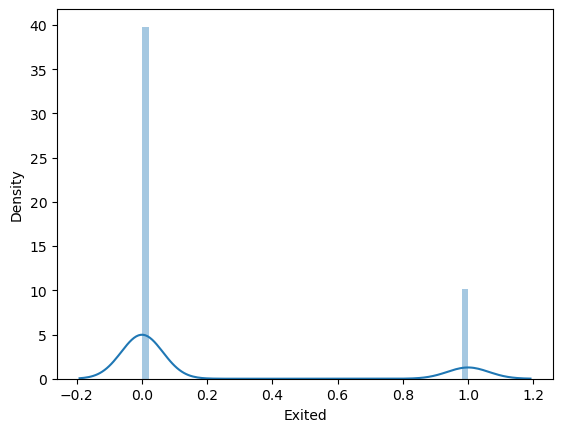

In [8]:
sns.distplot(bnk['Exited'])

### 2- Can you identify any significant differences in spending patterns between churned and nonchurned customers using measures of central tendency?

In [9]:
bnk.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
bank_est=bnk.loc[:,['Balance','EstimatedSalary', 'Exited']]
bank_est

,Balance,EstimatedSalary,Exited
0,0.00,101348.88,1
1,83807.86,112542.58,0
2,159660.80,113931.57,1
3,0.00,93826.63,0
4,125510.82,79084.10,0
...,...,...,...
9995,0.00,96270.64,0
9996,57369.61,101699.77,0
9997,0.00,42085.58,1
9998,75075.31,92888.52,1


In [20]:
spnd=bank_est[(bank_est['Exited']==0)]
spnd
#non-churned

,Balance,EstimatedSalary,Exited
1,83807.86,112542.58,0
3,0.00,93826.63,0
4,125510.82,79084.10,0
6,0.00,10062.80,0
8,142051.07,74940.50,0
...,...,...,...
9993,155060.41,29179.52,0
9994,0.00,167773.55,0
9995,0.00,96270.64,0
9996,57369.61,101699.77,0


In [22]:
spnd.describe()

,Balance,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.0
mean,72745.296779,99738.391772,0.0
std,62848.040701,57405.586966,0.0
min,0.000000,90.070000,0.0
25%,0.000000,50783.490000,0.0
50%,92072.680000,99645.040000,0.0
75%,126410.280000,148609.955000,0.0
max,221532.800000,199992.480000,0.0


churn_exp is a new data frame showing the expense of the people in the bank

In [26]:
spnd_exp=spnd['EstimatedSalary']-spnd['Balance']
spnd_exp

1        28734.72
3        93826.63
4       -46426.72
6        10062.80
8       -67110.57
          ...    
9993   -125880.89
9994    167773.55
9995     96270.64
9996     44330.16
9999    -91952.01
Length: 7963, dtype: float64

In [28]:
spnd_exp.mean()

26993.094993093055

In [29]:
spnd_exp.median()

26792.660000000003

In [31]:
#churned
churned=bank_est[(bank_est['Exited']==1)]
churned

,Balance,EstimatedSalary,Exited
0,0.00,101348.88,1
2,159660.80,113931.57,1
5,113755.78,149756.71,1
7,115046.74,119346.88,1
16,132602.88,5097.67,1
...,...,...,...
9981,152039.70,53445.17,1
9982,137145.12,115146.40,1
9991,88381.21,69384.71,1
9997,0.00,42085.58,1


In [32]:
churn_exp=churned['EstimatedSalary']-churned['Balance']
churn_exp

0       101348.88
2       -45729.23
5        36000.93
7         4300.14
16     -127505.21
          ...    
9981    -98594.53
9982    -21998.72
9991    -18996.50
9997     42085.58
9998     17813.21
Length: 2037, dtype: float64

In [33]:
churn_exp.describe()

count      2037.000000
mean      10357.138193
std       82732.093930
min     -203772.060000
25%      -56415.530000
50%       11745.860000
75%       65066.480000
max      199290.680000
dtype: float64

In [34]:
churn_exp.mean()

10357.138193421699

In [35]:
churn_exp.median()

11745.859999999986

<function matplotlib.pyplot.show(close=None, block=None)>

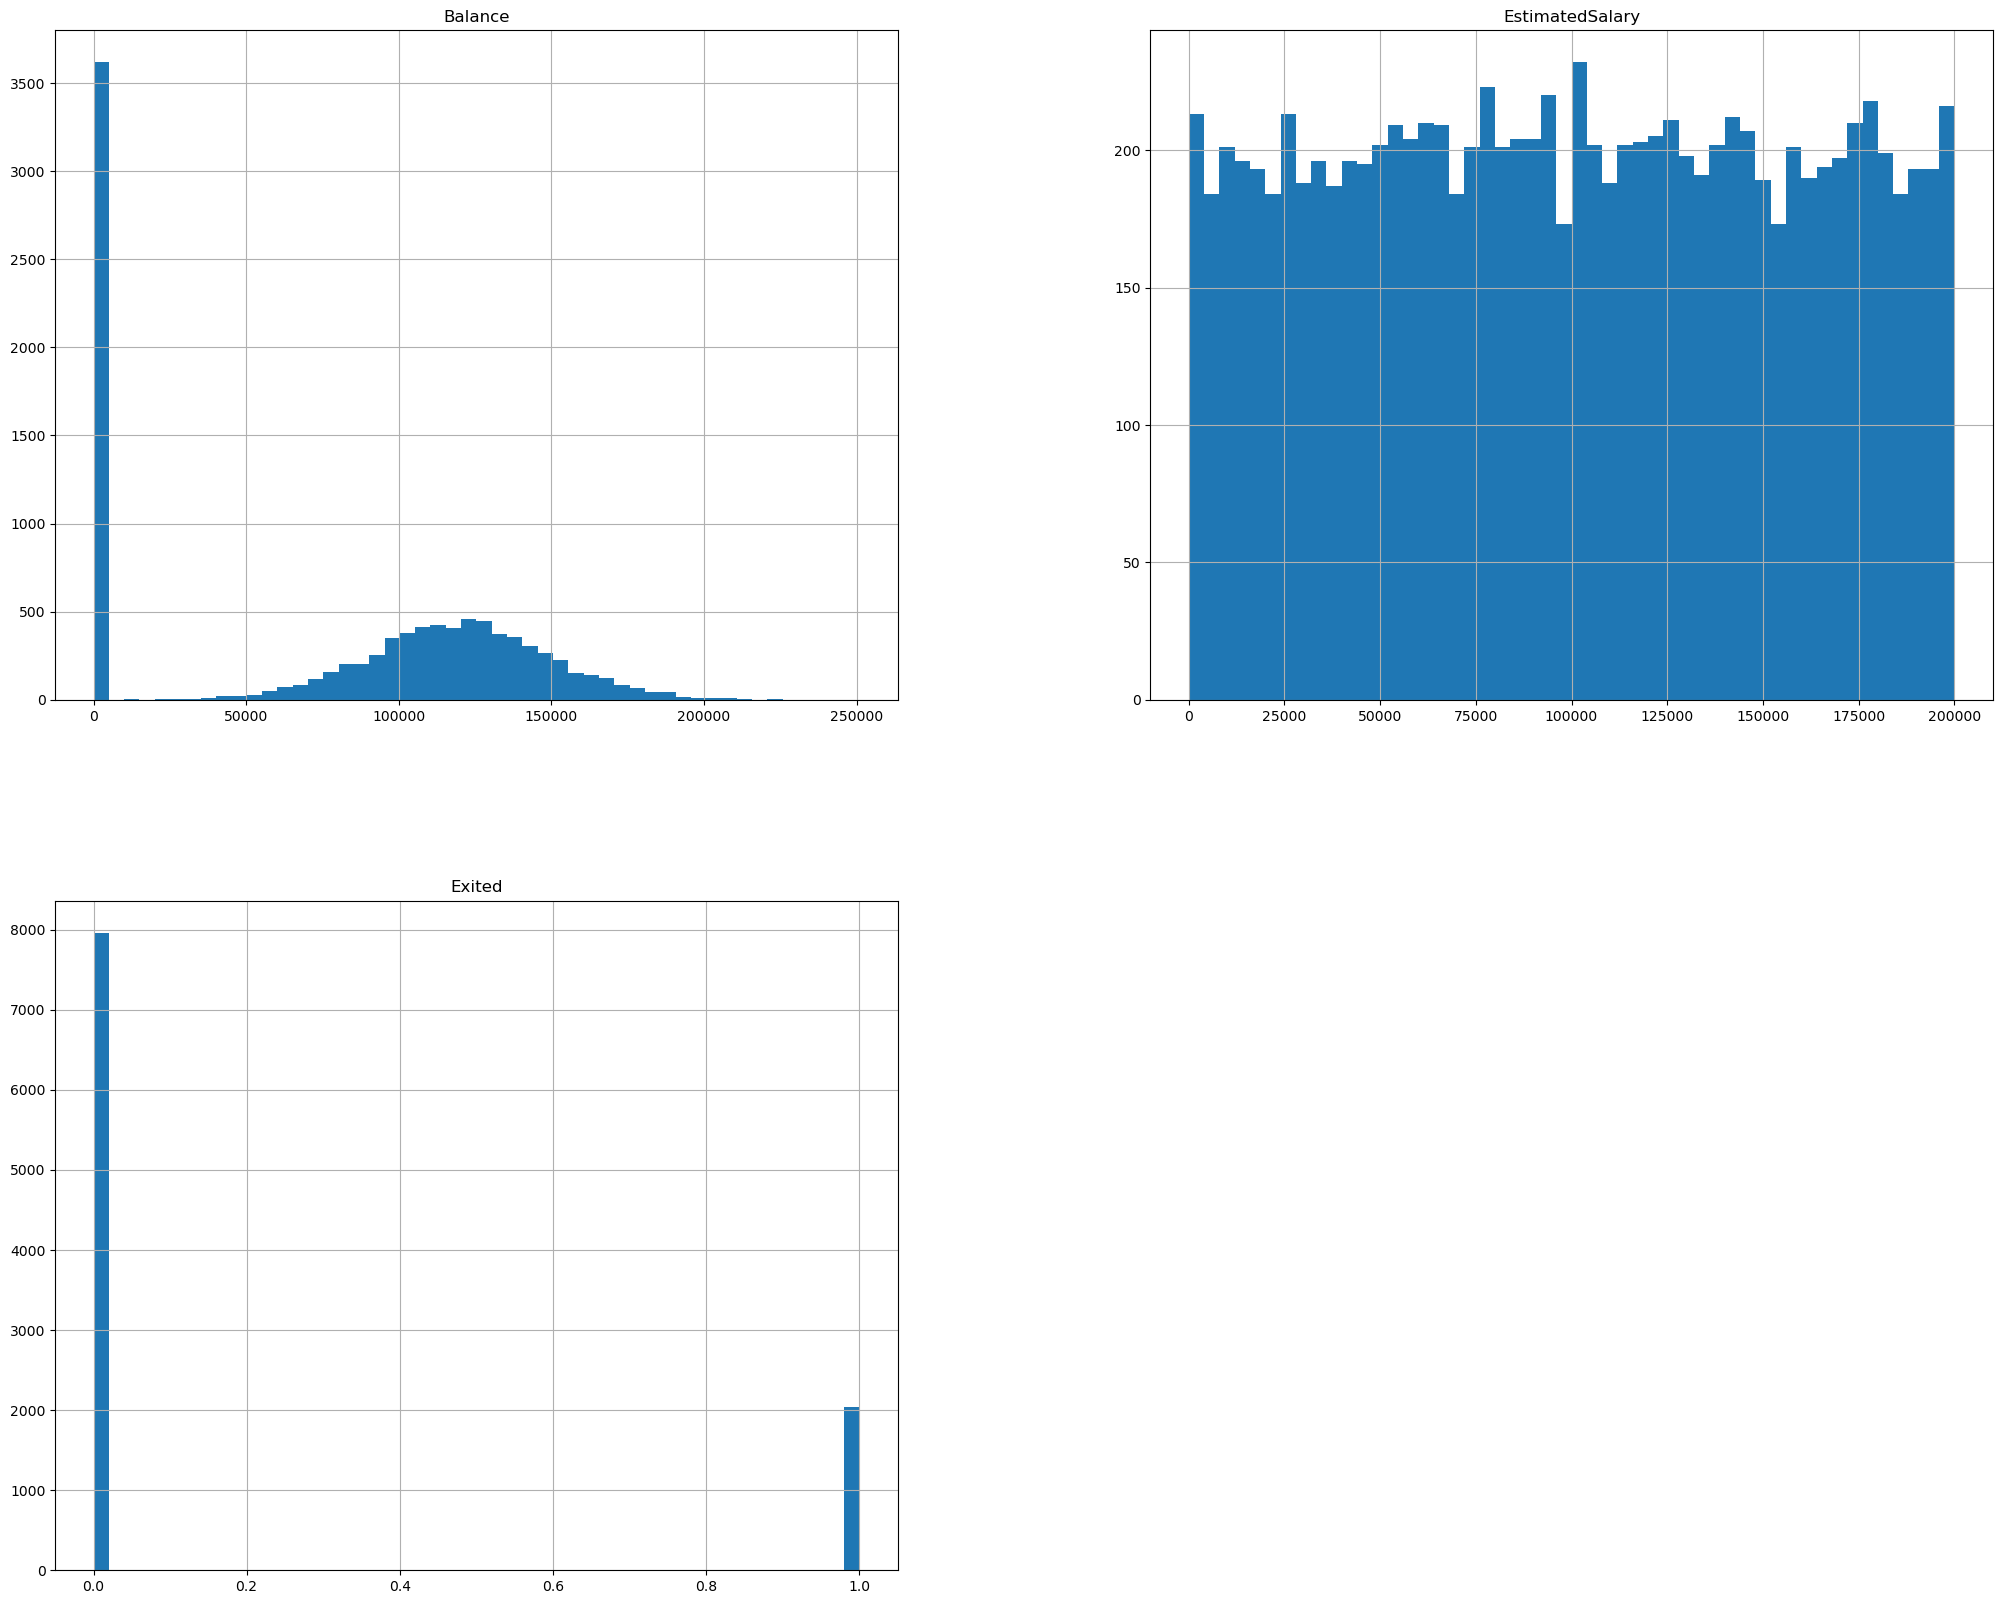

In [39]:
bank_est.hist(bins=50,figsize=(25,20))
plt.show

In [37]:
#the central tendency shows the avg spending pattern of non_churned customer is about nearly 27k
# the avg spending pattern of churned customer is about nearly 10-12k


### 3- What is the dispersion in customer tenure for both churned and non-churned customers, and how does this affect the predictive modeling process?

In [40]:
exited=bnk[bnk['Exited']==1]

In [44]:
exited_tenure=exited.loc[:,['Tenure']]
exited_tenure

,Tenure
0,2
2,8
5,8
7,4
16,1
...,...
9981,3
9982,7
9991,4
9997,7


In [45]:
exited_tenure.mean()  

Tenure    4.932744
dtype: float64

In [47]:
var_exit=np.var(exited_tenure)
var_exit

Tenure    8.616488
dtype: float64

In [49]:
std_exit=np.std(exited_tenure)
std_exit
#std churned shows small value,that indicate its not much dispersed

Tenure    2.935385
dtype: float64

In [50]:
non_exited=bnk[bnk['Exited']==0]

In [51]:
nonexited_tenure=non_exited.loc[:,['Tenure']]
nonexited_tenure

,Tenure
1,1
3,1
4,2
6,7
8,4
...,...
9993,7
9994,2
9995,5
9996,10


In [52]:
nonexited_tenure.mean()

Tenure    5.033279
dtype: float64

In [53]:
var_nonex=np.var(nonexited_tenure)
var_nonex

Tenure    8.297147
dtype: float64

In [54]:
std_nonex=np.std(nonexited_tenure)
std_nonex

Tenure    2.880477
dtype: float64

In [55]:
#in both exited and non exited people the values are not showing much dispersion

### 4- How does feature scaling works on top of different features work with different techniques such as min-max,norm, standardization and interpret how each of them worked?

In [56]:
from sklearn import preprocessing

In [58]:
churn_num=bnk.select_dtypes(["float64","int64"])
churn_num

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [59]:
normalise_churn=preprocessing.normalize(churn_num)

In [60]:
norm_churn=pd.DataFrame(normalise_churn,columns=churn_num.columns)
norm_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,3.186754e-04,0.999953,0.000041,2.480434e-06,3.194753e-07,0.004875,9.751600e-08,4.496297e-08,3.282679e-08,6.378347e-03,1.298236e-08
std,1.839794e-04,0.000031,0.000006,6.683334e-07,1.843337e-07,0.003977,3.706523e-08,2.905269e-08,3.185224e-08,3.664677e-03,2.566989e-08
min,6.395935e-08,0.999832,0.000022,1.138200e-06,0.000000e+00,0.000000,6.322177e-08,0.000000e+00,0.000000e+00,7.333044e-07,0.000000e+00
25%,1.593838e-04,0.999932,0.000037,2.032420e-06,1.896939e-07,0.000000,6.372675e-08,0.000000e+00,0.000000e+00,3.254866e-03,0.000000e+00
50%,3.185108e-04,0.999956,0.000042,2.369160e-06,3.188621e-07,0.006198,6.422266e-08,6.351802e-08,6.325329e-08,6.383061e-03,0.000000e+00
75%,4.781438e-04,0.999977,0.000046,2.799654e-06,4.496442e-07,0.008136,1.275023e-07,6.387661e-08,6.374345e-08,9.511575e-03,0.000000e+00
max,6.420543e-04,1.000000,0.000055,5.874306e-06,6.424146e-07,0.015920,2.569318e-07,6.424287e-08,6.424287e-08,1.280429e-02,6.424287e-08


In [61]:
scaler=preprocessing.StandardScaler()

In [62]:
churn_num1=churn_num.loc[:,["Balance","EstimatedSalary","Tenure"]]

In [63]:
scaled_data_churn=scaler.fit_transform(churn_num1)

In [64]:
churn_scale=pd.DataFrame(scaled_data_churn,columns=churn_num1.columns)
churn_scale

,Balance,EstimatedSalary,Tenure
0,-1.225848,0.021886,-1.041760
1,0.117350,0.216534,-1.387538
2,1.333053,0.240687,1.032908
3,-1.225848,-0.108918,-1.387538
4,0.785728,-0.365276,-1.041760
...,...,...,...
9995,-1.225848,-0.066419,-0.004426
9996,-0.306379,0.027988,1.724464
9997,-1.225848,-1.008643,0.687130
9998,-0.022608,-0.125231,-0.695982


In [65]:
churn_scale.describe()

,Balance,EstimatedSalary,Tenure
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-6.252776e-17,-2.877698e-17,-1.078249e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.225848e+00,-1.740268e+00,-1.733315e+00
25%,-1.225848e+00,-8.535935e-01,-6.959818e-01
50%,3.319639e-01,1.802807e-03,-4.425957e-03
75%,8.199205e-01,8.572431e-01,6.871299e-01
max,2.795323e+00,1.737200e+00,1.724464e+00


In [66]:
norm_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,3.186754e-04,0.999953,0.000041,2.480434e-06,3.194753e-07,0.004875,9.751600e-08,4.496297e-08,3.282679e-08,6.378347e-03,1.298236e-08
std,1.839794e-04,0.000031,0.000006,6.683334e-07,1.843337e-07,0.003977,3.706523e-08,2.905269e-08,3.185224e-08,3.664677e-03,2.566989e-08
min,6.395935e-08,0.999832,0.000022,1.138200e-06,0.000000e+00,0.000000,6.322177e-08,0.000000e+00,0.000000e+00,7.333044e-07,0.000000e+00
25%,1.593838e-04,0.999932,0.000037,2.032420e-06,1.896939e-07,0.000000,6.372675e-08,0.000000e+00,0.000000e+00,3.254866e-03,0.000000e+00
50%,3.185108e-04,0.999956,0.000042,2.369160e-06,3.188621e-07,0.006198,6.422266e-08,6.351802e-08,6.325329e-08,6.383061e-03,0.000000e+00
75%,4.781438e-04,0.999977,0.000046,2.799654e-06,4.496442e-07,0.008136,1.275023e-07,6.387661e-08,6.374345e-08,9.511575e-03,0.000000e+00
max,6.420543e-04,1.000000,0.000055,5.874306e-06,6.424146e-07,0.015920,2.569318e-07,6.424287e-08,6.424287e-08,1.280429e-02,6.424287e-08


### 5- Can you visualize the distribution of customer demographics such as age, income, and location for churned and non-churned customers using histograms or density plots?

{'whiskers': [<matplotlib.lines.Line2D at 0x2a118275b70>,
 'caps': [<matplotlib.lines.Line2D at 0x2a118274e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a118275b10>],
 'medians': [<matplotlib.lines.Line2D at 0x2a118275600>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a118274d00>],
 'means': []}

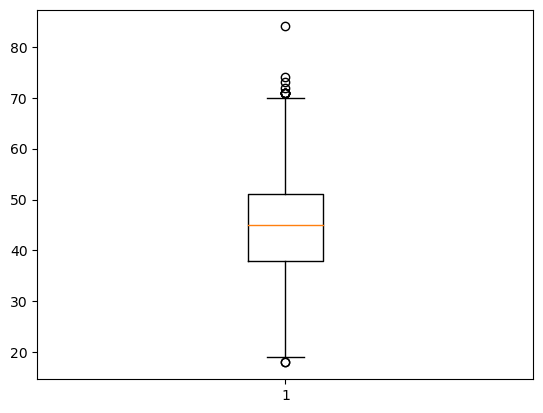

In [67]:
plt.boxplot(exited["Age"])
#max age of exited customers is 70 there are outliers also min age is 20 outliers to down also

C:\Users\theja\AppData\Local\Temp\ipykernel_9444\3931138971.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited["Age"])


<Axes: xlabel='Age', ylabel='Density'>

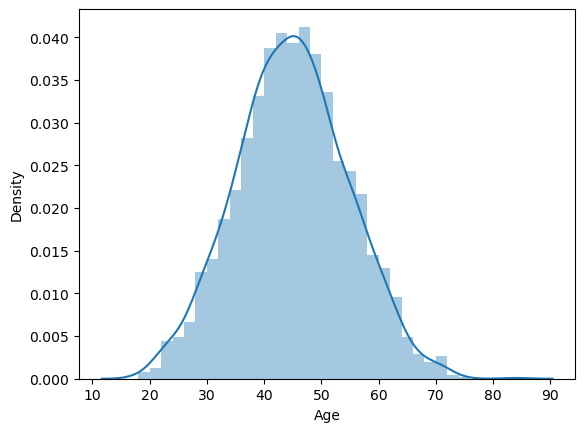

In [68]:
sns.distplot(exited["Age"])
# more frequency is seen in between 40-50

C:\Users\theja\AppData\Local\Temp\ipykernel_9444\4106280372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_exited["Age"])


<Axes: xlabel='Age', ylabel='Density'>

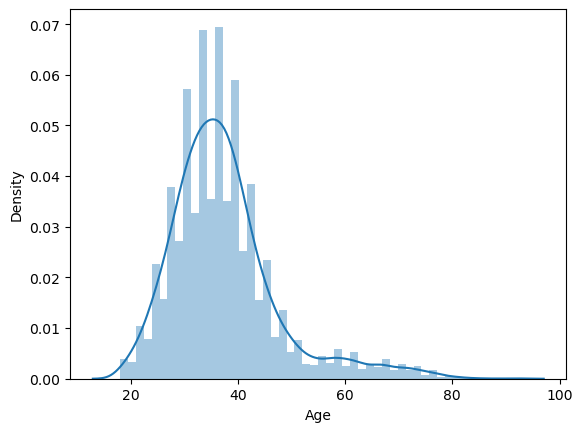

In [71]:
sns.distplot(non_exited["Age"])
#high density can be seen between 25-40 years , they didnt churn

{'whiskers': [<matplotlib.lines.Line2D at 0x2a11875ddb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a11875e2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a11875db40>],
 'medians': [<matplotlib.lines.Line2D at 0x2a11875e830>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a11875ead0>],
 'means': []}

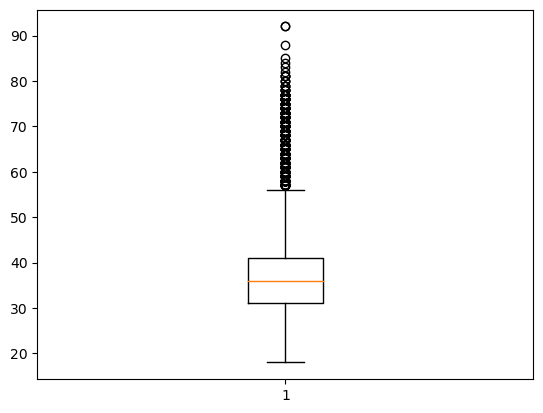

In [72]:
plt.boxplot(non_exited["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a11917a110>,
 'caps': [<matplotlib.lines.Line2D at 0x2a11917a530>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a119179e70>],
 'medians': [<matplotlib.lines.Line2D at 0x2a11917aa70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a11917ad10>],
 'means': []}

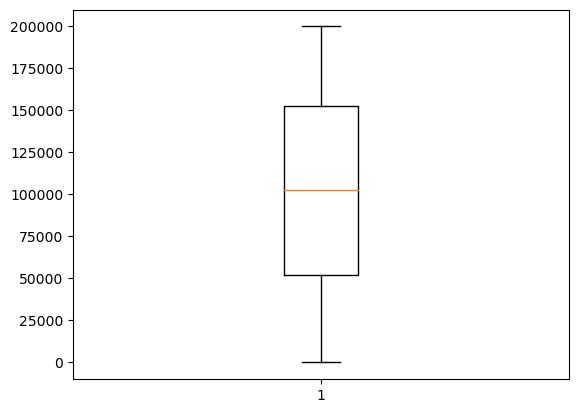

In [73]:
plt.boxplot(exited["EstimatedSalary"])
#average salary of people who churned is 1 lakh

C:\Users\theja\AppData\Local\Temp\ipykernel_9444\463265463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_exited["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

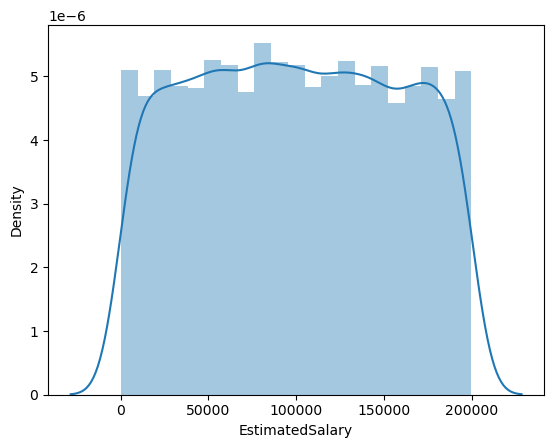

In [74]:
sns.distplot(non_exited["EstimatedSalary"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a118349750>,
 'caps': [<matplotlib.lines.Line2D at 0x2a118349c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1183494b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a118a96890>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a118ced000>],
 'means': []}

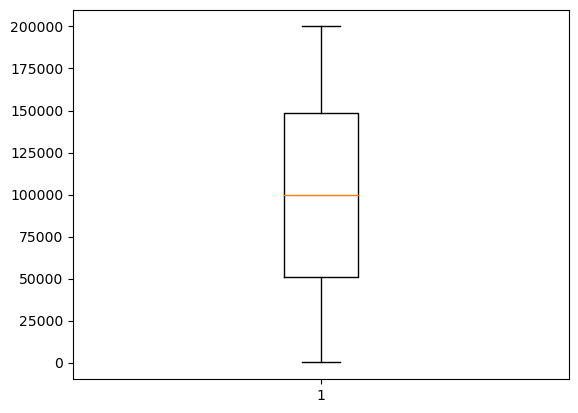

In [75]:
plt.boxplot(non_exited["EstimatedSalary"])

<Axes: title={'center': 'EstimatedSalary'}, xlabel='Geography'>

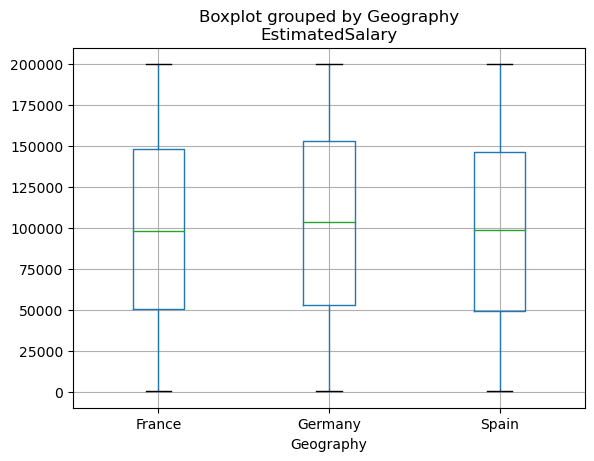

In [76]:
non_exited.boxplot(by="Geography",column="EstimatedSalary")

In [77]:
exited["Geography"].value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

-germany & france peoples had churned more than other country
-spain people has least churned

<Axes: title={'center': 'Age'}, xlabel='Geography'>

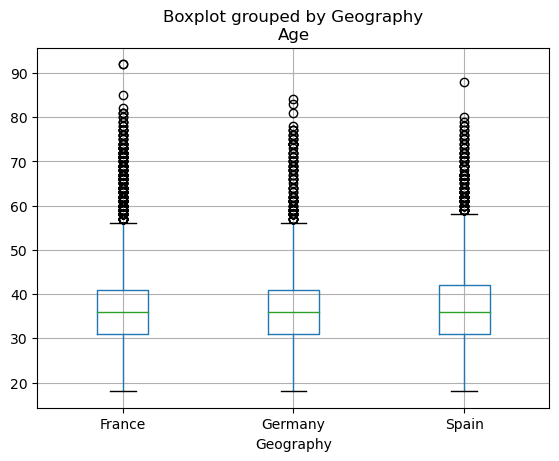

In [78]:
non_exited.boxplot(by="Geography",column="Age")

<Axes: title={'center': 'Age'}, xlabel='Geography'>

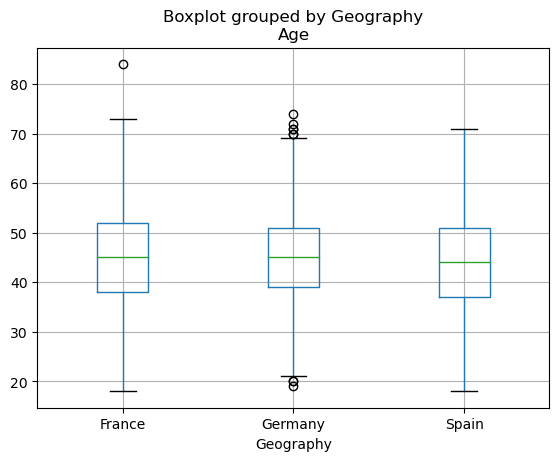

In [79]:
exited.boxplot(by="Geography",column="Age")
#in churned data with comparison of age and place spain is the more without much measure of spread
#non churned data is having a great spread in all three countries

### 6- Is there a significant correlation between customer satisfaction scores and the likelihood of churn, and how does this influence the development of churn prediction models?

In [80]:
corr_exited=exited.corr()

C:\Users\theja\AppData\Local\Temp\ipykernel_9444\2496950372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_exited=exited.corr()


In [81]:
corr_exited["CreditScore"].sort_values(ascending=False)
#no correlation for churned customers credit score

CreditScore        1.000000
Tenure             0.027727
Balance            0.017386
RowNumber          0.015125
NumOfProducts      0.000432
IsActiveMember    -0.000778
CustomerId        -0.001731
Age               -0.011033
HasCrCard         -0.012321
EstimatedSalary   -0.055129
Exited                  NaN
Name: CreditScore, dtype: float64